In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os.path
import cPickle as pickle
from matplotlib.gridspec import GridSpec
import string

%config InlineBackend.figure_format = 'svg'

In [5]:
sns.set_style('ticks')

In [6]:
full_data_path = "full_data.pkl"

In [7]:
data = pickle.load(open(full_data_path, 'r'))

In [8]:
# colours = ['#89a8e0','#4878cf','#385589','#6acc65']

N = 5
width = .2
ind = np.arange(N)

In [9]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [10]:
ind

array([0, 1, 2, 3, 4])

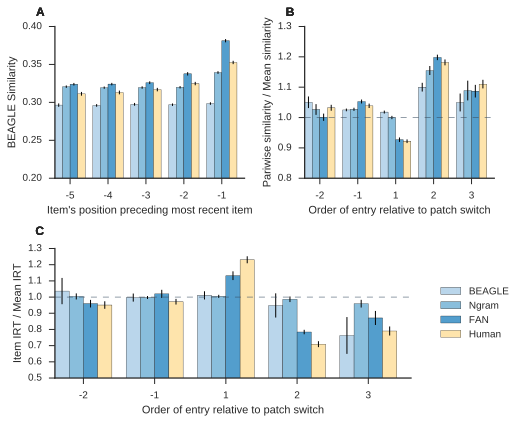

In [11]:
sources = ["beagle", "ngram", "fan", "human"]
source_names = ["BEAGLE", "Ngram", "FAN", "Human"]
cs = sns.color_palette("Blues")
colours = [cs[1], cs[2], cs[3], '#fee4ac']


y_labels = ["BEAGLE Similarity", "Pariwise similarity / Mean similarity", "Item IRT / Mean IRT"]
x_labels = ["Item's position preceding most recent item", "Order of entry relative to patch switch", "Order of entry relative to patch switch"]
x_ticklabels = [[-1, -2, -3, -4, -5], [-2, -1, 1, 2, 3], [-2, -1, 1, 2, 3]]
y_lims = [[0.2,.4], [0.8, 1.3], [0.5, 1.3]]

fig = plt.figure(figsize=cm2inch(20, 16))

gs = GridSpec(16,16)
locs = [gs[:7,0:7], gs[:7,9:], gs[10:,:13]]
legends = [False, False, True]
axhlines = [False, True, True]
signs = [-1, 1, 1]

figs_meta = zip(range(3), x_labels, y_labels, x_ticklabels, y_lims, locs, legends, axhlines)

for i, x_label, y_label, x_ticklabel, y_lim, loc, legend, axhline in figs_meta:

    rects = []
    ax = fig.add_subplot(loc)

    if axhline:
        plt.axhline(y=1, linestyle='--', color='#34495e', linewidth=.5)
    
    for c, source in enumerate(sources):
        #TODO: figure out error bar colour bug
        
        rects.append(ax.bar(signs[i]*ind+width*c, data[source][i].values[:,0], width, color=colours[c],
                            yerr=data[source][i].values[:,1],
                            error_kw=dict(elinewidth=1,ecolor='black', capsize=0),                       
                           )
                    )
        left = -0.1
        up = 1.07
        if legend:
            left, up = -0.055, 1.105
            
        ax.text(left, up, string.ascii_uppercase[i], transform=ax.transAxes, 
            size=12, weight='bold')

    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticks(signs[i]*ind + width*2)
    ax.set_xticklabels(x_ticklabel)
    ax.set_ylim(y_lim)
    

    if legend:
        ax.legend(rects, source_names, loc='center right', bbox_to_anchor=(1.3,0.5), fontsize=10)

    #ax.set_title(title, fontsize=16)

sns.despine() # Remove border lines on the top and right
if 0:
    plt.savefig('results.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()